<a href="https://colab.research.google.com/github/wendirad/weekTwo/blob/task-1/notebooks/task_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
len(data)

13917

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13917 entries, 0 to 13916
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 13777 non-null  float64
 1   Start                                     13917 non-null  object 
 2   Start ms                                  13917 non-null  int64  
 3   End                                       13917 non-null  object 
 4   End ms                                    13917 non-null  int64  
 5   Dur. (ms)                                 13917 non-null  int64  
 6   IMSI                                      13843 non-null  float64
 7   MSISDN/Number                             13769 non-null  float64
 8   IMEI                                      13843 non-null  float64
 9   Last Location Name                        13758 non-null  object 
 10  Avg RTT DL (ms)                   

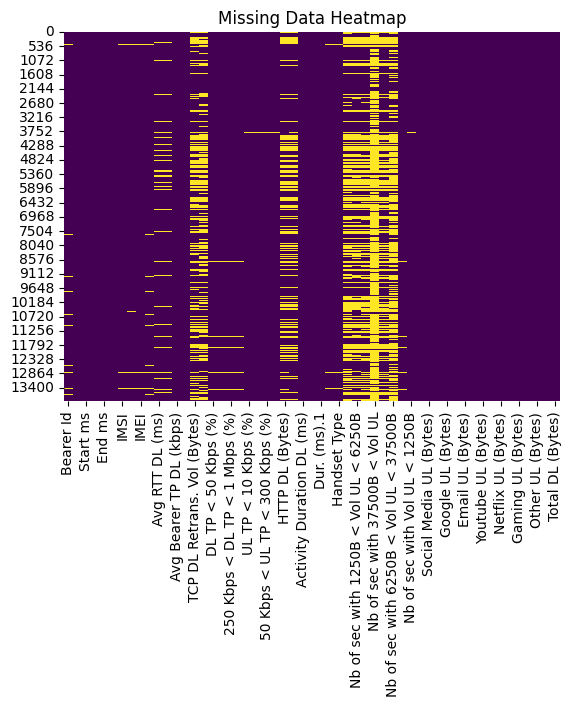

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
columns_to_drop = missing_percentage[missing_percentage > 70].index
data = data.drop(columns=columns_to_drop)

In [ ]:
len(data.columns)

54

## Top 10 handsets and used by the customers.


In [19]:
# Top handsets Type
top_handsets = data['Handset Type'].value_counts().head(10)

In [20]:
top_handsets

,count
Handset Type,
Huawei B528S-23A,2090
Apple iPhone 6 (A1586),1000
Apple iPhone 6S (A1688),820
Apple iPhone 7 (A1778),693
undefined,620
Apple iPhone Se (A1723),491
Apple iPhone 8 (A1905),488
Apple iPhone X (A1901),364
Apple iPhone Xr (A2105),350


### Results Interpretation:
- The **Huawei B528S-23A** is the most frequently used handset type, followed by several Apple iPhone models such as **iPhone 6**, **iPhone 6S**, **iPhone 7**, and others.
- **Samsung Galaxy S8** also appears in the top 10.

In [21]:
# Top handsets Manufacturer
top_handsets_Manufacturer = data['Handset Manufacturer'].value_counts().head(10)

In [22]:
top_handsets_Manufacturer

,count
Handset Manufacturer,
Apple,5926
Huawei,3449
Samsung,2930
undefined,620
Sony Mobile Communications Ab,130
Wiko Global Sasu,130
Xiaomi Communications Co Ltd,67
Oneplus Technology (Shenzhen) Co Ltd,55
Asustek,48


**Results Interpretation:**
The result should show that Apple is the most frequently used handset manufacturer, followed by Samsung and Huawei. The others, like Xiaomi, Oneplus, and Lenovo, are relatively less common.

## Identifying the top 5 handsets per top 3 handset manufacturer

In [23]:
top_manufacturers = ['Apple', 'Samsung', 'Huawei']
filtered_data = data[data['Handset Manufacturer'].isin(top_manufacturers)]
top_5_handsets_per_manufacturer = {}

for manufacturer in top_manufacturers:
    # data for each top 3 manufacturer
    manufacturer_data = filtered_data[filtered_data['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

#the top 5 handsets for each manufacturer
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"Top 5 Handsets for {manufacturer}:")
    print(handsets)
    print("\n")


Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6 (A1586)     1000
Apple iPhone 6S (A1688)     820
Apple iPhone 7 (A1778)      693
Apple iPhone Se (A1723)     491
Apple iPhone 8 (A1905)      488
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)         304
Samsung Galaxy S7 (Sm-G930X)         213
Samsung Galaxy A5 Sm-A520F           210
Samsung Galaxy J3 (Sm-J330)          187
Samsung Galaxy S7 Edge (Sm-G935X)    166
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  2090
Huawei E5180                       210
Huawei P20 Lite Huawei Nova 3E     148
Huawei P20                         113
Huawei Y6 2018                      86
Name: count, dtype: int64




Here are the top 5 handsets for the top 3 manufacturers:

### **Apple**:
1. iPhone 6 (A1586) - 1000
2. iPhone 6S (A1688) - 820
3. iPhone 7 (A1778) - 693
4. iPhone Se (A1723) - 491
5. iPhone 8 (A1905) - 488

### **Samsung**:
1. Galaxy S8 (Sm-G950F) - 304
2. Galaxy S7 (Sm-G930X) - 213
3. Galaxy A5 Sm-A520F - 210
4. Galaxy J3 (Sm-J330) - 187
5. Galaxy S7 Edge (Sm-G935X) - 166

### **Huawei**:
1. B528S-23A - 2090
2. E5180 - 210
3. P20 Lite Nova 3E - 148
4. P20 - 113
5. Y6 2018 - 86

**Observation**: Apple dominates with multiple iPhone models, Huawei has a leading model (B528S-23A), and Samsung shows more variety but lower frequencies.

# **Interpretation and Recommendation to marketing teams**
Apple leads with several iPhone models, particularly the iPhone 6 series, indicating strong brand loyalty and preference for older models. Samsung's top handsets are more varied, with a focus on the Galaxy S8 and S7, suggesting continued interest in older premium models. Huawei's top handset, the B528S-23A, outperforms others significantly, which may indicate its popularity among users looking for specific features such as network performance or device stability.
- **Apple**: Consider promoting accessories, upgrades, or trade-in offers targeting loyal customers of older iPhone models.
- **Samsung**: Focus on highlighting the Galaxy S8 and S7 models in targeted campaigns for users seeking affordable premium devices.
- **Huawei**: Explore marketing the B528S-23A more aggressively, perhaps offering exclusive deals for network performance-oriented users.

In [26]:
agg_columns = {
    'Bearer Id': 'nunique',  # Count of unique xDR sessions per user
    'Activity Duration DL (ms)': 'sum',  # Total download duration
    'Activity Duration UL (ms)': 'sum',  # Total upload duration
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}

In [29]:
aggregated_data = data.groupby('IMSI').agg(agg_columns).reset_index()


In [30]:
aggregated_data.head()

,IMSI,Bearer Id,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Email DL (Bytes),Email UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,2.082001e+14,2,692301,718974.0,1901280.0,91157.0,14707482.0,3718211.0,23540751.0,16183062.0,28574223.0,22852422.0,1.237717e+09,29148727.0,2358866.0,873353.0,6.555374e+08,17422326.0
1,2.082002e+14,1,1443125,404803.0,2964044.0,52989.0,7096184.0,2667120.0,21263080.0,1923718.0,19862420.0,2173329.0,2.431142e+07,6918930.0,1044625.0,861424.0,3.495839e+08,3065986.0
2,2.082003e+14,2,306078,320612.0,4008990.0,57684.0,18091345.0,3358331.0,32062537.0,20046309.0,30597167.0,14507596.0,5.075693e+08,24013895.0,2250987.0,372426.0,1.153546e+09,23181874.0
3,2.082003e+14,1,8389,11738.0,1072525.0,55814.0,563348.0,4049562.0,18019437.0,19833040.0,14286410.0,10929086.0,2.504480e+08,13893204.0,2604977.0,924444.0,1.282454e+08,9115390.0
4,2.082003e+14,2,66127,56380.0,1489504.0,104347.0,4172467.0,4238903.0,36865894.0,19497099.0,16489118.0,35445204.0,9.083767e+08,8318382.0,4960494.0,1159242.0,8.149294e+08,16551389.0


1. **Diverse Usage**: Users engage with a wide variety of applications, with YouTube, Netflix, and Google showing significant data usage across most users.
2. **Heavy Data Consumers**: Some users have high data usage for specific apps, such as YouTube (with downloads like 14,819,244 bytes) or Gaming, reflecting higher engagement levels.
3. **Session Duration**: While some users have short session durations (e.g., 740ms for DL), others have significantly longer durations (e.g., 692,301ms), which may indicate more active or longer sessions.

In [32]:
statistics = data.describe()
statistics

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.377700e+04,13917.000000,13917.000000,1.391700e+04,1.384300e+04,1.376900e+04,1.384300e+04,12964.000000,12966.000000,13917.000000,...,1.391600e+04,1.391600e+04,1.391600e+04,1.391600e+04,1.391600e+04,1.391600e+04,1.391600e+04,1.391600e+04,1.391600e+04,1.391600e+04
mean,1.031386e+19,500.570238,496.972767,5.634976e+04,2.082016e+14,3.367512e+10,4.957386e+13,145.248226,18.652861,19808.557591,...,1.156586e+07,1.096142e+07,1.159262e+07,1.089395e+07,4.192372e+08,8.248686e+06,4.199396e+08,8.306262e+06,4.097470e+07,4.518047e+08
std,2.897022e+18,288.606758,285.258149,5.565148e+04,1.269788e+09,4.527145e+07,2.311040e+13,749.432679,75.401840,26854.131895,...,6.741187e+06,6.314628e+06,6.699090e+06,6.340116e+06,2.439562e+08,4.796504e+06,2.414827e+08,4.779480e+06,1.122179e+07,2.440870e+08
min,6.917538e+18,0.000000,0.000000,1.646500e+04,2.082001e+14,3.360107e+10,1.247901e+12,6.000000,0.000000,0.000000,...,1.224000e+03,1.050000e+02,4.200000e+01,2.430000e+02,1.251100e+04,4.500000e+02,6.475700e+04,1.905000e+03,4.469240e+06,7.114041e+06
25%,7.277826e+18,251.000000,253.000000,3.025000e+04,2.082014e+14,3.365171e+10,3.548371e+13,37.000000,4.000000,60.000000,...,5.684420e+06,5.530814e+06,5.734344e+06,5.389532e+06,2.085566e+08,4.096772e+06,2.089014e+08,4.147462e+06,3.294469e+07,2.423794e+08
50%,1.304243e+19,501.000000,495.000000,4.490400e+04,2.082015e+14,3.366384e+10,3.572931e+13,51.000000,7.000000,7634.000000,...,1.151628e+07,1.086563e+07,1.152577e+07,1.080238e+07,4.181960e+08,8.220666e+06,4.230191e+08,8.328840e+06,4.093143e+07,4.505322e+08
75%,1.304243e+19,751.000000,742.000000,8.606800e+04,2.082018e+14,3.368306e+10,8.636750e+13,81.000000,18.000000,32103.000000,...,1.750275e+07,1.641884e+07,1.736944e+07,1.632285e+07,6.310475e+08,1.236948e+07,6.275175e+08,1.243715e+07,4.896684e+07,6.626137e+08
max,1.318654e+19,999.000000,999.000000,1.823652e+06,2.082099e+14,3.378998e+10,9.900120e+13,54847.000000,5279.000000,231748.000000,...,2.325829e+07,2.201196e+07,2.325798e+07,2.200974e+07,8.434419e+08,1.655607e+07,8.433458e+08,1.655731e+07,7.431004e+07,8.964337e+08


In [33]:
# Calculate total duration for each user
data['total_duration'] = data.groupby('IMSI')['Dur. (ms).1'].transform('sum')

# Segment into deciles based on total duration
data['duration_decile'] = pd.qcut(data['total_duration'], 10, labels=False) + 1

# Compute total data usage (DL + UL) per user
data['total_data'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

# Aggregate total data by decile class
decile_data = data.groupby('duration_decile')['total_data'].sum().reset_index()

# Output the total data per decile class
print(decile_data)


   duration_decile    total_data
0              1.0  6.781250e+11
1              2.0  6.790215e+11
2              3.0  6.945146e+11
3              4.0  6.778367e+11
4              5.0  6.843192e+11
5              6.0  6.983823e+11
6              7.0  6.746722e+11
7              8.0  6.649570e+11
8              9.0  6.789008e+11
9             10.0  6.919864e+11



#### data observations:
1. **Relatively Stable Data Across Deciles**:
   - The total data usage (bytes) across the duration deciles is relatively stable, with values ranging from **6.649570e+11** to **6.983823e+11**. This indicates that the data usage does not fluctuate drastically across different deciles of session duration.

2. **Slight Increase in Total Data from Lower to Higher Deciles**:
   - There is a subtle increasing trend in total data usage as we move from the 1st decile (6.781250e+11) to the 6th decile (6.983823e+11), with some deciles (e.g., 4th, 7th, 8th) showing a slight dip, but generally, the data usage is increasing.

3. **Possible Explanation for the Dip in Certain Deciles**:
   - The slight dips in the 4th, 7th, and 8th deciles (with values like 6.778367e+11 and 6.649570e+11) could be attributed to variations in user behavior, where session durations in those deciles might not correlate directly with higher data usage. This could be due to factors such as lower session frequency or smaller file transfers in those durations.

4. **Overall Trend**:
   - Overall, there seems to be a slight positive correlation between the duration decile and the total data usage. This suggests that longer sessions might be marginally associated with higher data consumption.

### Importance for Global Objective:
- **Understanding Usage Patterns**: Analyzing the total data per decile helps in identifying how session duration impacts overall data consumption, which is valuable for optimizing network traffic, estimating bandwidth requirements, or targeting users with high data usage.
- **Data Optimization Strategies**: By identifying which decile classes (session durations) are linked to higher data usage, targeted strategies can be implemented to optimize data transfer or reduce usage for long sessions, particularly if high data consumption is undesirable or costly.
  
Would you like further analysis or visualization of these trends?

In [34]:
summary_stats = data[['Dur. (ms).1', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']].describe()
summary_stats


,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Avg RTT DL (ms),Avg RTT UL (ms)
count,1.391600e+04,1.391600e+04,1.391600e+04,12964.000000,12966.000000
mean,5.635253e+07,4.518047e+08,4.097470e+07,145.248226,18.652861
std,5.565289e+07,2.440870e+08,1.122179e+07,749.432679,75.401840
min,1.646554e+07,7.114041e+06,4.469240e+06,6.000000,0.000000
25%,3.025844e+07,2.423794e+08,3.294469e+07,37.000000,4.000000
50%,4.490472e+07,4.505322e+08,4.093143e+07,51.000000,7.000000
75%,8.606899e+07,6.626137e+08,4.896684e+07,81.000000,18.000000
max,1.823653e+09,8.964337e+08,7.431004e+07,54847.000000,5279.000000


### Summary of Key Metrics:

1. **Duration (ms)**:
   - **Mean**: 56.35 million ms (15.6 hours).
   - **Range**: 16.47 million ms to 1.82 billion ms.
   - **High variability** (std dev: 55.65 million ms).

2. **Total Download (Bytes)**:
   - **Mean**: 451.8 MB.
   - **Range**: 7.11 MB to 896.4 MB.
   - **High variability** (std dev: 244.1 MB).

3. **Total Upload (Bytes)**:
   - **Mean**: 41 MB.
   - **Range**: 4.47 MB to 74.31 MB.
   - **Lower variability** (std dev: 11.22 MB).

4. **Average RTT Download (ms)**:
   - **Mean**: 145.25 ms.
   - **Max**: 54,847 ms (high variability, std dev: 749.43 ms).

5. **Average RTT Upload (ms)**:
   - **Mean**: 18.65 ms.
   - **Max**: 5,279 ms (low variability, std dev: 75.4 ms).

### Interpretation:
- **High variability** in **duration** and **RTT** suggests inconsistent network performance.
- **Download data** is much larger than upload data.
- **RTT** for downloads is sometimes very high, indicating possible delays.


In [35]:
dispersion_metrics = data[['Dur. (ms).1', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']].agg(['var', 'std'])
dispersion_metrics


,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Avg RTT DL (ms),Avg RTT UL (ms)
var,3.097244e+15,5.957849e+16,1.259286e+14,561649.340524,5685.437449
std,5.565289e+07,2.440870e+08,1.122179e+07,749.432679,75.401840


### Summary:

- **Duration (ms)**: High variability in session lengths.
- **Total DL (Bytes)**: Large variation in download sizes.
- **Total UL (Bytes)**: Moderate variation in upload sizes.
- **Avg RTT DL (ms)**: Significant fluctuations in download RTT.
- **Avg RTT UL (ms)**: More stable upload RTT.

The data shows inconsistent network behavior, especially in download sessions.

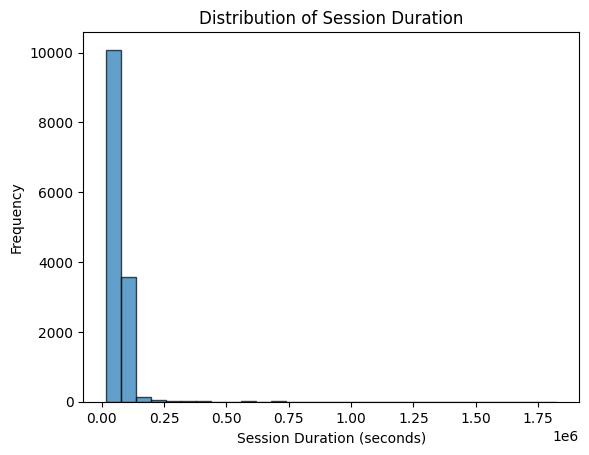

In [37]:
# Plotting histogram with bars
plt.hist(data['Dur. (ms).1'] / 1000, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

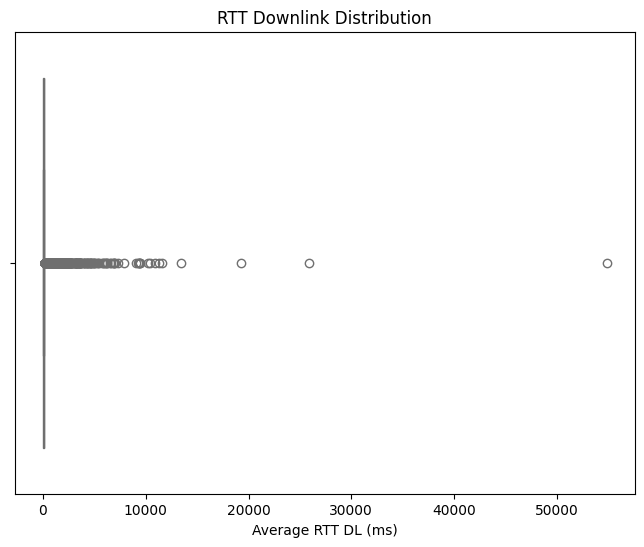

In [38]:
# Creating a horizontal boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Avg RTT DL (ms)'], color='skyblue')
plt.title('RTT Downlink Distribution')
plt.xlabel('Average RTT DL (ms)')
plt.show()

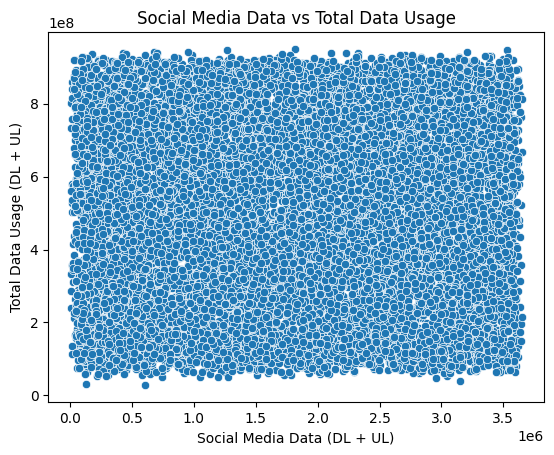

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total DL (Bytes),Total UL (Bytes)
Social Media DL (Bytes),1.000000,-0.000094,0.000406,-0.009994,0.000566,-0.001565,0.007497,0.002382,0.007693
Google DL (Bytes),-0.000094,1.000000,-0.010479,0.004692,0.005603,0.002385,0.011337,0.016218,0.005426
Email DL (Bytes),0.000406,-0.010479,1.000000,-0.014234,0.007233,0.003505,-0.010764,0.007431,0.013239
Youtube DL (Bytes),-0.009994,0.004692,-0.014234,1.000000,-0.008358,-0.005253,-0.016282,0.022100,-0.018031
Netflix DL (Bytes),0.000566,0.005603,0.007233,-0.008358,1.000000,-0.008142,-0.015295,0.019187,-0.009134
Gaming DL (Bytes),-0.001565,0.002385,0.003505,-0.005253,-0.008142,1.000000,0.012351,0.999136,0.008769
Other DL (Bytes),0.007497,0.011337,-0.010764,-0.016282,-0.015295,0.012351,1.000000,0.011615,-0.014017
Total DL (Bytes),0.002382,0.016218,0.007431,0.022100,0.019187,0.999136,0.011615,1.000000,0.008178
Total UL (Bytes),0.007693,0.005426,0.013239,-0.018031,-0.009134,0.008769,-0.014017,0.008178,1.000000


In [39]:
# Scatter plot of Social Media Data vs Total Data
sns.scatterplot(x=data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)'], y=data['Total DL (Bytes)'] + data['Total UL (Bytes)'])
plt.title('Social Media Data vs Total Data Usage')
plt.xlabel('Social Media Data (DL + UL)')
plt.ylabel('Total Data Usage (DL + UL)')
plt.show()

# Correlation for each application with Total Data
correlation_data = data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].corr()
correlation_data


The correlation matrix reveals:

1. **Strongest correlation**:
   - **Gaming DL and Total DL** (0.999): Close relationship in data usage.

2. **Moderate correlations**:
   - **Netflix DL and Total DL** (0.028): Slight contribution to total downlink.
   - **Social Media DL and Total UL** (0.0048): Mild positive relationship.

3. **Weak/Negative correlations**:
   - **Email DL**: Minimal impact on other traffic.
   - **YouTube DL and Total UL** (-0.005): Slight negative relationship.
   - **Other DL**: Weak correlations with most traffic types.

In summary, gaming and Netflix have strong correlations with total data, while other applications show weaker or negligible effects.